In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
# %matplotlib widget

In [2]:
G = nx.read_gml('./data/karate/karate-Copy1.gml',label = 'id')
G = G.to_directed()

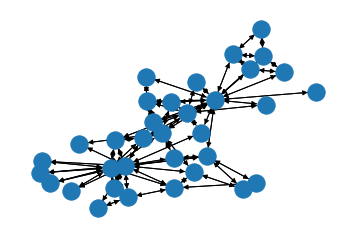

In [3]:
fig, ax = plt.subplots()
ax.axis('off')

spring_layout_for_G = nx.spring_layout(G, seed=4) # position of nodes not random
nx.draw_networkx(G,pos=spring_layout_for_G,with_labels=False)

In [4]:
# Centrality measures
degs = nx.degree_centrality(G)
degs_vals = [degs[key] for key in degs.keys()]

eigs = nx.eigenvector_centrality(G)
eigs_vals = [eigs[key] for key in eigs.keys()]

katzs = nx.katz_centrality(G)
katzs_vals = [katzs[key] for key in katzs.keys()]

clos = nx.closeness_centrality(G)
clos_vals = [clos[key] for key in clos.keys()]

pageranks = nx.pagerank(G)
pageranks_vals = [pageranks[key] for key in pageranks.keys()]

betweenesss = nx.betweenness_centrality(G)
betweenesss_vals = [betweenesss[key] for key in betweenesss.keys()]

In [5]:
df = pd.DataFrame()
df['nodeId'] = degs.keys()
df['degc'] = degs_vals
df['eigc'] = eigs_vals
df['katzc'] = katzs_vals
df['closc'] = clos_vals
df['pagerankc'] = pageranks_vals
df['betweenessc'] = betweenesss_vals

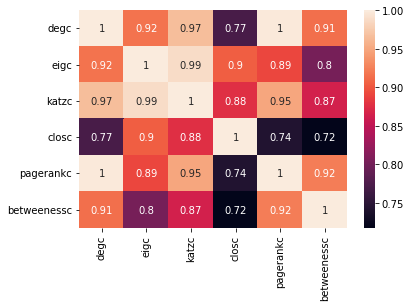

In [6]:
# correlation
cols = list(df.columns)
cols.remove('nodeId')
corr_matr = df[cols].corr()

import seaborn as sns
#correlation matrix
sns.heatmap(corr_matr, annot = True)

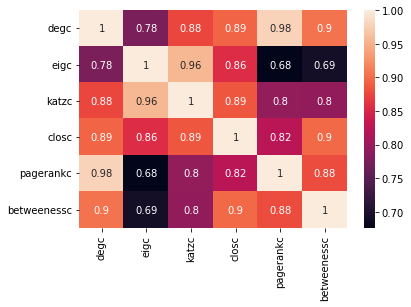

In [7]:
corr_matr = df[cols].corr('spearman')
sns.heatmap(corr_matr, annot = True)

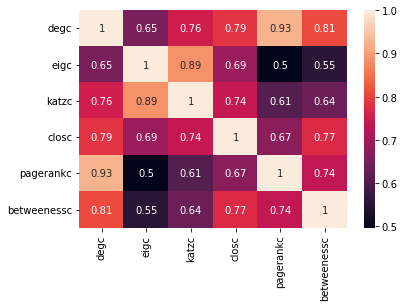

In [8]:
corr_matr = df[cols].corr('kendall')
sns.heatmap(corr_matr, annot = True)

In [9]:
# Minmax normalization

In [10]:
def normalize_pandas_column(df, column):
    return (df[column] - df[column].min())/(df[column].max() - df[column].min())

In [11]:
degc_normed = normalize_pandas_column(df, 'degc')

eigc_normed = normalize_pandas_column(df, 'eigc')

katzc_normed = normalize_pandas_column(df, 'katzc')

closc_normed = normalize_pandas_column(df, 'closc')

pagerankc_normed = normalize_pandas_column(df, 'pagerankc')

betweenessc_normed = normalize_pandas_column(df, 'betweenessc')


In [12]:
meanc_normed = np.mean([degc_normed, eigc_normed,katzc_normed, closc_normed,pagerankc_normed, betweenessc_normed], axis =0)

C:\Users\LoizosLaptop\.conda\envs\py3711\lib\site-packages\matplotlib\cbook\__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\LoizosLaptop\.conda\envs\py3711\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


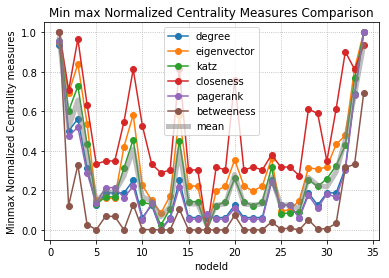

In [13]:
fig, ax = plt.subplots()
plt.title('Min max Normalized Centrality Measures Comparison')
plt.plot(degs.keys(), degc_normed,'o-', label = 'degree')
plt.plot(eigs.keys(), eigc_normed, 'o-', label = 'eigenvector')
plt.plot(katzs.keys(), katzc_normed,'o-', label = 'katz')
plt.plot(clos.keys(), closc_normed, 'o-', label = 'closeness')
plt.plot(pageranks.keys(), pagerankc_normed, 'o-', label = 'pagerank')
plt.plot(betweenesss.keys(), betweenessc_normed, 'o-', label = 'betweeness')
plt.plot(pageranks.keys(), meanc_normed, '-', label = 'mean', lw = 5, color = 'grey', alpha = 0.5)
ax.set_xlabel('nodeId')
ax.set_ylabel('Minmax Normalized Centrality measures')
ax.legend(loc = 'best')
ax.grid(ls = ':')

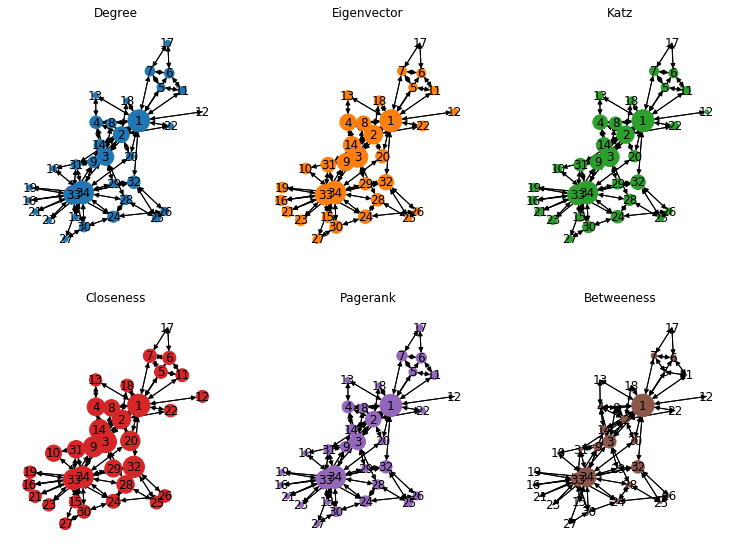

In [14]:
fig, axs = plt.subplots(2,3, figsize=(2*6.4, 2*4.8), tight_layout=False)
axs[0][0].axis('off')
axs[0][1].axis('off')
axs[0][2].axis('off')

axs[1][0].axis('off')
axs[1][1].axis('off')
axs[1][2].axis('off')

# axs[2][0].axis('off')
# axs[2][1].axis('off')
# axs[2][2].axis('off')

axs[0][0].title.set_text('Degree')
axs[0][1].title.set_text('Eigenvector')
axs[0][2].title.set_text('Katz')
axs[1][0].title.set_text('Closeness')
axs[1][1].title.set_text('Pagerank')
axs[1][2].title.set_text('Betweeness')



nx.draw_networkx(G,pos=spring_layout_for_G,with_labels=True,node_size = [500.*val for val in degc_normed], node_color = 'tab:blue',ax=axs[0,0])
nx.draw_networkx(G,pos=spring_layout_for_G,with_labels=True,node_size = [500.*val for val in eigc_normed],node_color = 'tab:orange',ax=axs[0,1])
nx.draw_networkx(G,pos=spring_layout_for_G,with_labels=True,node_size = [500.*val for val in katzc_normed],node_color = 'tab:green',ax=axs[0,2])


nx.draw_networkx(G,pos=spring_layout_for_G,with_labels=True,node_size = [500.*val for val in closc_normed],node_color = 'tab:red',ax=axs[1,0])
nx.draw_networkx(G,pos=spring_layout_for_G,with_labels=True,node_size = [500.*val for val in pagerankc_normed],node_color = 'tab:purple',ax=axs[1,1])
nx.draw_networkx(G,pos=spring_layout_for_G,with_labels=True,node_size = [500.*val for val in betweenessc_normed],node_color = 'tab:brown',ax=axs[1,2])

In [15]:
# s zcore normalization

In [16]:
# z score normalization
cols = list(df.columns)
cols.remove('nodeId')
df[cols]

,degc,eigc,katzc,closc,pagerankc,betweenessc
0,0.969697,0.355483,0.321325,0.568966,0.097002,0.437635
1,0.545455,0.265954,0.235484,0.485294,0.052878,0.053937
2,0.606061,0.317189,0.265766,0.559322,0.057078,0.143657
3,0.363636,0.211174,0.194913,0.464789,0.035861,0.011909
4,0.181818,0.075966,0.121904,0.379310,0.021979,0.000631
5,0.242424,0.079481,0.130972,0.383721,0.029113,0.029987
6,0.242424,0.079481,0.130972,0.383721,0.029113,0.029987
7,0.242424,0.170955,0.166233,0.440000,0.024491,0.000000
8,0.303030,0.227405,0.200718,0.515625,0.029765,0.055927
9,0.121212,0.102675,0.124202,0.434211,0.014309,0.000848


In [17]:
# now iterate over the remaining columns and create a new zscore column
for col in cols:
    col_zscore = col + '_zscore'
    df[col_zscore] = (df[col] - df[col].mean())/df[col].std(ddof=0)
df

,nodeId,degc,eigc,katzc,closc,pagerankc,betweenessc,degc_zscore,eigc_zscore,katzc_zscore,closc_zscore,pagerankc_zscore,betweenessc_zscore
0,1,0.969697,0.355483,0.321325,0.568966,0.097002,0.437635,2.987091,2.341089,2.657348,2.006170,3.100243,4.253474
1,2,0.545455,0.265954,0.235484,0.485294,0.052878,0.053937,1.154803,1.338579,1.239345,0.828095,1.076375,0.107306
2,3,0.606061,0.317189,0.265766,0.559322,0.057078,0.143657,1.416559,1.912290,1.739569,1.870391,1.269023,1.076803
3,4,0.363636,0.211174,0.194913,0.464789,0.035861,0.011909,0.369537,0.725182,0.569149,0.539384,0.295799,-0.346833
4,5,0.181818,0.075966,0.121904,0.379310,0.021979,0.000631,-0.415729,-0.788808,-0.636889,-0.664133,-0.340910,-0.468700
5,6,0.242424,0.079481,0.130972,0.383721,0.029113,0.029987,-0.153974,-0.749459,-0.487096,-0.602033,-0.013688,-0.151485
6,7,0.242424,0.079481,0.130972,0.383721,0.029113,0.029987,-0.153974,-0.749459,-0.487096,-0.602033,-0.013688,-0.151485
7,8,0.242424,0.170955,0.166233,0.440000,0.024491,0.000000,-0.153974,0.274829,0.095379,0.190364,-0.225718,-0.475522
8,9,0.303030,0.227405,0.200718,0.515625,0.029765,0.055927,0.107782,0.906929,0.665035,1.255147,0.016218,0.128811
9,10,0.121212,0.102675,0.124202,0.434211,0.014309,0.000848,-0.677485,-0.489737,-0.598943,0.108849,-0.692741,-0.466362


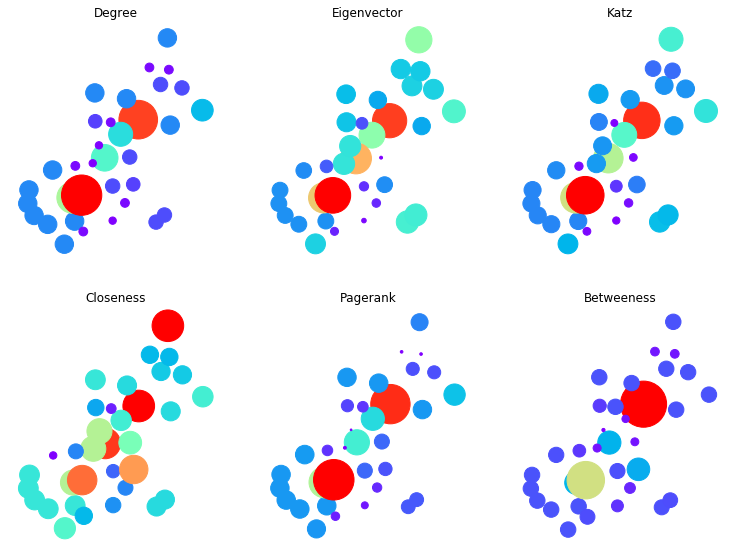

In [18]:
fig, axs = plt.subplots(2,3, figsize=(2*6.4, 2*4.8), tight_layout=False)
# fig.patch.set_facecolor('silver')

scaling_factor = 500.0
# alpha_factor  = 1.0
cmap_all = plt.cm.rainbow #BuGn#rainbow#

axs[0][0].axis('off')
axs[0][1].axis('off')
axs[0][2].axis('off')

axs[1][0].axis('off')
axs[1][1].axis('off')
axs[1][2].axis('off')

# axs[2][0].axis('off')
# axs[2][1].axis('off')
# axs[2][2].axis('off')

axs[0][0].title.set_text('Degree')
axs[0][1].title.set_text('Eigenvector')
axs[0][2].title.set_text('Katz')
axs[1][0].title.set_text('Closeness')
axs[1][1].title.set_text('Pagerank')
axs[1][2].title.set_text('Betweeness')

nx.draw_networkx_nodes(
    G,
    pos=spring_layout_for_G,
    node_size = scaling_factor*df.degc_zscore.abs(),
    node_color = scaling_factor*df.degc_zscore.abs(),
    cmap= cmap_all,
    ax = axs[0][0]
)

nx.draw_networkx_nodes(
    G,
    pos=spring_layout_for_G,
    node_size = scaling_factor*df.eigc_zscore.abs(),
    node_color = scaling_factor*df.eigc_zscore.abs(),
    cmap= cmap_all,
    ax = axs[0][1]
)

nx.draw_networkx_nodes(
    G,
    pos=spring_layout_for_G,
    node_size = scaling_factor*df.katzc_zscore.abs(),
    node_color = scaling_factor*df.katzc_zscore.abs(),
    cmap= cmap_all,
    ax = axs[0][2]
)

nx.draw_networkx_nodes(
    G,
    pos=spring_layout_for_G,
    node_size = scaling_factor*df.closc_zscore.abs(),
    node_color = scaling_factor*df.closc_zscore.abs(),
    cmap= cmap_all,
    ax = axs[1][0]
)
nx.draw_networkx_nodes(
    G,
    pos=spring_layout_for_G,
    node_size = scaling_factor*df.pagerankc_zscore.abs(),
    node_color = scaling_factor*df.pagerankc_zscore.abs(),
    cmap= cmap_all,
    ax = axs[1][1]
)

nx.draw_networkx_nodes(
    G,
    pos=spring_layout_for_G,
    node_size = scaling_factor*df.betweenessc_zscore.abs(),
    node_color = scaling_factor*df.betweenessc_zscore.abs(),
    cmap= cmap_all,
    ax = axs[1][2]
)